In [1]:
''' Shap '''

' Shap '

In [1]:
pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [2]:
!pip install datasets seqeval evaluate transformers torch pytesseract lime scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from PIL import Image, ImageDraw, ImageFont
import evaluate
from transformers import AutoProcessor, LayoutLMv3ForSequenceClassification, set_seed, LayoutLMv3TokenizerFast
from datasets import load_dataset
import transformers as t
import torch
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


set_seed(0)

In [4]:
model = LayoutLMv3ForSequenceClassification.from_pretrained("gordonlim/layoutlmv3-base-finetuned-rvlcdip").to(device)
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

In [5]:
# pip install -U datasets
mini_rvl   = load_dataset(
    "dvgodoy/rvl_cdip_mini", split="validation"
)

class_names = {'0': 'letter',
            '1': 'form',
            '2': 'email',
            '3': 'handwritten',
            '4': 'advertisement',
            '5': 'scientific report',
            '6': 'scientific publication',
            '7': 'specification',
            '8': 'file folder',
            '9': 'news article',
            '10': 'budget',
            '11': 'invoice',
            '12': 'presentation',
            '13': 'questionnaire',
            '14': 'resume',
            '15': 'memo'}

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/341M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/41.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3200 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

In [133]:
# Take sample from rvl
sample = mini_rvl[100] #104
image = sample['image'].convert("RGB")
words = sample['ocr_words']
bboxes = sample['word_boxes']
print(sample.keys())
print(sample['label'])
print(words)
sample['image']
TARGET = sample['label']
# FORM

dict_keys(['image', 'width', 'height', 'category', 'ocr_words', 'word_boxes', 'ocr_paragraphs', 'paragraph_boxes', 'label'])
1
['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', 'Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', 'TEST METHOD: _', 'fIevor', 'deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '

In [8]:
inputs = processor(images=[image], text=[words],boxes=[bboxes], return_tensors="pt")
inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits
print(logits)
predicted_class_id = logits.argmax(-1).item()
gt = sample['label']
print(f'pred -> {model.config.id2label[predicted_class_id]} actual -> {gt}')
model.config.id2label[predicted_class_id]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


tensor([[-0.9538,  7.3849, -2.4934, -1.7242, -2.2957,  5.2018, -0.5007, -0.5510,
         -0.2103, -2.0204, -1.0210, -0.6517, -0.3231,  0.0479, -1.1607, -0.4476]],
       device='cuda:0')
pred -> LABEL_1 actual -> 1


'LABEL_1'

## Text

In [135]:
delimiter = '|~|'
def safe_split(doc_str):
  return doc_str.split(delimiter)


In [136]:
import shap
from tqdm import tqdm
import numpy as np

MASK = processor.tokenizer.mask_token


def make_text_predict_fn(model, processor, image, boxes, words, align_bboxes=False):
    """Return a batching function accepted by SHAP."""
    def predict(words_batch):
        """
        words_batch: list of strings, each string is a full document where
                    masked tokens appear as '[MASK]' (inserted by SHAP)
        """
        encs = []
        #print(len(words_batch))
        for doc_str in words_batch:

          words = safe_split(doc_str)                  # same rule as masker
          if align_bboxes:
            for idx, item in enumerate(words):
              if processor.tokenizer.mask_token in item:
                boxes[idx] = [0,0,0,0]
          enc = processor(
              images=[image],
              text=[words],
              boxes=[boxes[:len(words)]],          # keep alignment
              return_tensors="pt",
              padding="max_length",
              truncation=True,
              max_length=128,
          )
          encs.append(enc)

        batch = {k: torch.cat([e[k] for e in encs]).to(device)
                for k in encs[0]}

        with torch.no_grad():
            logits = model(**batch).logits            # (batch, n_classes)
        return torch.softmax(logits, dim=-1).cpu().numpy()
    return predict

In [137]:
'''
Below sentinel tokenizer is a workaround to split the document by using the same delimeter
This is becasue SHAP takes a batch of strings (split by del.) where each string is a doc
Some elements in arr OCR_WORDS contain '  ' (the normal delimiter) so a sentinel delimiter was used
This function tells the masker to use the same delimeter as the document string
'''
def sentinel_tokenizer(s, return_offsets_mapping=True, **kw):
    toks = [t for t in s.split(delimiter) if t]
    ids  = list(range(len(toks)))                    # dummy ids
    # Tells shap where each token lives in orignal sring
    if return_offsets_mapping:
        offs, pos = [], 0
        for t in toks:
            offs.append((pos, pos + len(t)))
            pos += len(t) + len(delimiter)
        return {"input_ids": ids, "offset_mapping": offs}
    else:
        return {"input_ids": ids}

###no bbox masking

In [139]:
print(TARGET)

1


In [143]:
predict_fn = make_text_predict_fn(model, processor, image, bboxes, words)
masker = shap.maskers.Text(tokenizer=sentinel_tokenizer,mask_token=processor.tokenizer.mask_token)
explainer = shap.Explainer(predict_fn,
                           masker=masker,
                           algorithm="partition",
                          outputs=[TARGET])

doc = delimiter.join(words)

text_vals = explainer([doc],max_evals=2000) # 1000
# shap_values = explainer([[1]*len(words)])

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/1998 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modelin

In [14]:
import numpy as np
import pandas as pd

shap_out = vals[0]                    # shap.Explanation object

# 1️⃣  decide which class you care about
probs        = predict_fn([doc])[0]   # reuse your predictor
pred_cls_idx = probs.argmax()         # index of the predicted class
print(f"Predicted class = {pred_cls_idx}  (p = {probs[pred_cls_idx]:.3f})")

# 2️⃣  pair every token with its SHAP value for that class
tokens   = safe_split(doc)            # same splitter you used in predict()
scores   = shap_out.values[:, pred_cls_idx]

# 3️⃣  sort by absolute contribution and show the top-k
k = 30                               # how many to display
top_idx   = np.argsort(np.abs(scores))[::-1][:k]

table = pd.DataFrame({
    "token" : [tokens[i] for i in top_idx],
    "SHAP"  : scores[top_idx]
})

print(table.to_string(index=False, justify="right", float_format="%.4f"))

Predicted class = 1  (p = 0.921)
                   token    SHAP
           SUMMARY SHEET  0.1257
                      ZE  0.0673
                  TITLE:  0.0651
                  SIGNED  0.0650
                   DATE;  0.0649
          DATE CCMPLETED  0.0571
                RESULTS: -0.0406
And_ahave_nrepardlloa L_  0.0323
            PREPARATION;  0.0278
                      44  0.0260
                2_XLDJCE  0.0258
                  judges  0.0240
                PURPOSE:  0.0223
              comoirison  0.0218
             PROJECT NO. -0.0209
                   AxiLa  0.0208
                    auts  0.0206
                  Paired  0.0195
                 Xlkoros -0.0189
                  X6D4ET  0.0172
             Ouihzi IILL -0.0169
                   WNLtA -0.0167
                  ba]lot  0.0166
             differences -0.0165
         Qul zk_"' cigt:  0.0146
                ba/&nced  0.0136
            YeadEster' k -0.0123
            Ouutl_Ac4LlE  0.0123
          

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [15]:
weights_dict = table.to_dict()
print(weights_dict)

{'token': {0: 'SUMMARY SHEET', 1: 'ZE', 2: 'TITLE:', 3: 'SIGNED', 4: 'DATE;', 5: 'DATE CCMPLETED', 6: 'RESULTS:', 7: 'And_ahave_nrepardlloa L_', 8: 'PREPARATION;', 9: '44', 10: '2_XLDJCE', 11: 'judges', 12: 'PURPOSE:', 13: 'comoirison', 14: 'PROJECT NO.', 15: 'AxiLa', 16: 'auts', 17: 'Paired', 18: 'Xlkoros', 19: 'X6D4ET', 20: 'Ouihzi IILL', 21: 'WNLtA', 22: 'ba]lot', 23: 'differences', 24: 'Qul zk_"\' cigt:', 25: 'ba/&nced', 26: "YeadEster' k", 27: 'Ouutl_Ac4LlE', 28: 'the', 29: 'Vions'}, 'SHAP': {0: 0.1257061735377647, 1: 0.06725236709462479, 2: 0.06513892277143896, 3: 0.06502069314584082, 4: 0.06489808461628854, 5: 0.05706396294400042, 6: -0.04057912330608815, 7: 0.03227796882856637, 8: 0.02779354457743466, 9: 0.026041808305308223, 10: 0.025760985736269504, 11: 0.024030581233091652, 12: 0.022282487945631146, 13: 0.021810721838846803, 14: -0.020864223944954574, 15: 0.020824289647862315, 16: 0.020557628304231912, 17: 0.019478732952848077, 18: -0.018888129445258528, 19: 0.01718815771164

/tmp/ipython-input-16-3141154652.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")  # red-blue diverging


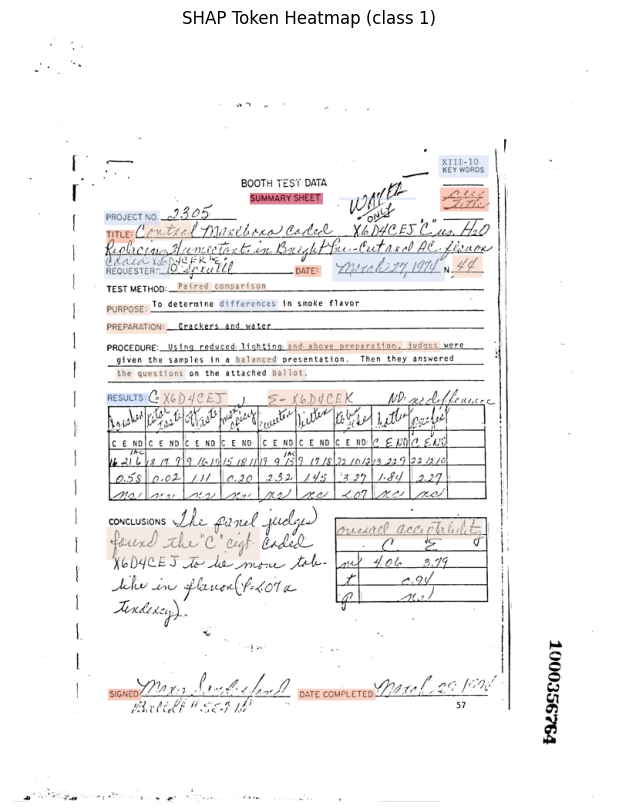

In [16]:
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def draw_shap_token_heatmap(image, tokens, boxes, shap_values, alpha=0.4, top_k=None):
    assert len(tokens) == len(boxes) == len(shap_values), "Lengths must match"

    draw = ImageDraw.Draw(image, mode="RGBA")

    # Optionally select top-k tokens
    if top_k is not None:
        top_idx = np.argsort(np.abs(shap_values))[-top_k:]
    else:
        top_idx = range(len(tokens))

    # Normalize shap_values to [0,1] for colour mapping
    norm_vals = shap_values[top_idx]
    norm = np.abs(norm_vals) / (np.max(np.abs(norm_vals)) + 1e-8)

    # Use a colormap: red = negative, blue = positive
    cmap = cm.get_cmap("coolwarm")  # red-blue diverging

    for i, idx in enumerate(top_idx):
        box = boxes[idx]
        score = shap_values[idx]
        colour = cmap(0.5 + 0.5 * np.sign(score) * norm[i])  # map score to RGB
        rgba = tuple(int(255 * c) for c in colour[:3]) + (int(255 * alpha),)
        draw.rectangle(box, fill=rgba)

    return image

tokens = safe_split(doc)                          # your sentinel split
scores = vals[0].values[:, 1]             # pick a class

assert len(tokens) == len(bboxes) == len(scores)  # always validate

highlighted_image = draw_shap_token_heatmap(
    image.copy(), tokens, bboxes, scores, alpha=0.5, top_k=30
)

plt.figure(figsize=(12, 10))
plt.imshow(highlighted_image)
plt.axis('off')
plt.title(f"SHAP Token Heatmap (class {1})")
plt.show()

### with bbox mask alingment

In [42]:
predict_fn_aligned = make_text_predict_fn(model, processor, image, bboxes, words, align_bboxes=True)
masker = shap.maskers.Text(tokenizer=sentinel_tokenizer,mask_token=processor.tokenizer.mask_token)
explainer = shap.Explainer(predict_fn_aligned, masker=masker, algorithm="partition")

doc = delimiter.join(words)

vals = explainer([doc],max_evals=1000) # 1000
# shap_values = explainer([[1]*len(words)])

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/998 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modelin

In [43]:
import numpy as np
import pandas as pd

shap_out = vals[0]                    # shap.Explanation object

# 1️⃣  decide which class you care about
probs        = predict_fn([doc])[0]   # reuse your predictor
pred_cls_idx = probs.argmax()         # index of the predicted class
print(f"Predicted class = {pred_cls_idx}  (p = {probs[pred_cls_idx]:.3f})")

# 2️⃣  pair every token with its SHAP value for that class
tokens   = safe_split(doc)            # same splitter you used in predict()
scores   = shap_out.values[:, pred_cls_idx]

# 3️⃣  sort by absolute contribution and show the top-k
k = 30                               # how many to display
top_idx   = np.argsort(np.abs(scores))[::-1][:k]

table = pd.DataFrame({
    "token" : [tokens[i] for i in top_idx],
    "SHAP"  : scores[top_idx]
})

print(table.to_string(index=False, justify="right", float_format="%.4f"))

Predicted class = 5  (p = 0.852)
                   token    SHAP
                  SIGNED -0.0626
          DATE CCMPLETED -0.0616
                   DATE; -0.0452
                RESULTS:  0.0432
                      ZE -0.0409
                   AxiLa -0.0320
             PROJECT NO.  0.0314
                  TITLE: -0.0305
             XEMCEL&"ZHo -0.0283
                 flbnLEl -0.0267
                      44 -0.0244
              PROCEOURE: -0.0206
                   Walng -0.0204
                       5 -0.0193
                  judges -0.0192
              comoirison -0.0182
                PURPOSE: -0.0177
                  NAUuui  0.0172
                  Paired -0.0171
And_ahave_nrepardlloa L_ -0.0169
             CONCLUSIONS -0.0168
                     ouy -0.0166
               lLi LSLLi -0.0152
                     Joa -0.0151
           SUMMARY SHEET -0.0149
         Leduced Lghting  0.0148
         Qul zk_"' cigt:  0.0121
                Apd_naer  0.0117
          

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


/tmp/ipython-input-44-3141154652.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")  # red-blue diverging


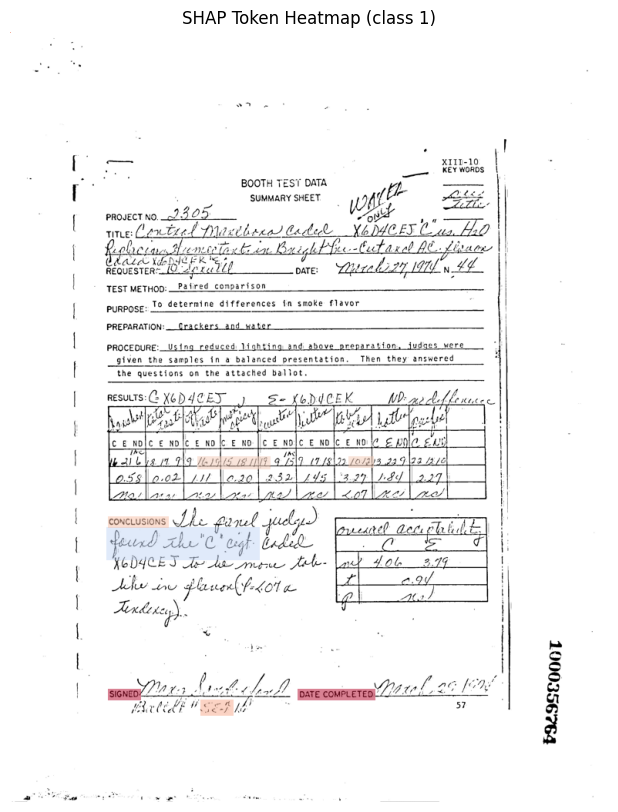

In [44]:
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def draw_shap_token_heatmap(image, tokens, boxes, shap_values, alpha=0.4, top_k=None):
    assert len(tokens) == len(boxes) == len(shap_values), "Lengths must match"

    draw = ImageDraw.Draw(image, mode="RGBA")

    # Optionally select top-k tokens
    if top_k is not None:
        top_idx = np.argsort(np.abs(shap_values))[-top_k:]
    else:
        top_idx = range(len(tokens))

    # Normalize shap_values to [0,1] for colour mapping
    norm_vals = shap_values[top_idx]
    norm = np.abs(norm_vals) / (np.max(np.abs(norm_vals)) + 1e-8)

    # Use a colormap: red = negative, blue = positive
    cmap = cm.get_cmap("coolwarm")  # red-blue diverging

    for i, idx in enumerate(top_idx):
        box = boxes[idx]
        score = shap_values[idx]
        colour = cmap(0.5 + 0.5 * np.sign(score) * norm[i])  # map score to RGB
        rgba = tuple(int(255 * c) for c in colour[:3]) + (int(255 * alpha),)
        draw.rectangle(box, fill=rgba)

    return image

tokens = safe_split(doc)                          # your sentinel split
scores = vals[0].values[:, 1]             # pick a class

assert len(tokens) == len(bboxes) == len(scores)  # always validate

highlighted_image = draw_shap_token_heatmap(
    image.copy(), tokens, bboxes, scores, alpha=0.5, top_k=30
)

plt.figure(figsize=(12, 10))
plt.imshow(highlighted_image)
plt.axis('off')
plt.title(f"SHAP Token Heatmap (class {1})")
plt.show()

## Vision

In [144]:
def make_predict_fn(model, processor, image, boxes, words):
    """Return a batching function accepted by SHAP."""
    def predict(images_batch):
        """
        words_batch: list of strings, each string is a full document where
                    masked tokens appear as '[MASK]' (inserted by SHAP)
        """
        encs = []
        #print(len(words_batch))
        for perturbed in images_batch:
            # words = safe_split(doc_str)                  # same rule as masker
            enc = processor(
                images=[perturbed],
                text=[words],
                boxes=[boxes[:len(words)]],          # keep alignment
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=128,
            )
            encs.append(enc)

        batch = {k: torch.cat([e[k] for e in encs]).to(device)
                for k in encs[0]}

        with torch.no_grad():
            logits = model(**batch).logits            # (batch, n_classes)
        return torch.softmax(logits, dim=-1).cpu().numpy()
    return predict

In [145]:
predict_fn = make_predict_fn(model, processor, image, bboxes, words)

In [146]:


masker = shap.maskers.Image("inpaint_telea", shape=(image.height, image.width, 3))


In [148]:
explainer = shap.Explainer(predict_fn, masker=masker, outputs=[TARGET], algorithm="partition")

In [26]:
print(image)

<PIL.Image.Image image mode=RGB size=777x1000 at 0x795D2A54D990>


In [46]:
np.array(image).shape

(1000, 777, 3)

In [149]:
vision_vals = explainer(np.array([np.array(image)]), max_evals=2000) # TODO: Add batch size arg

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/1998 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modelin

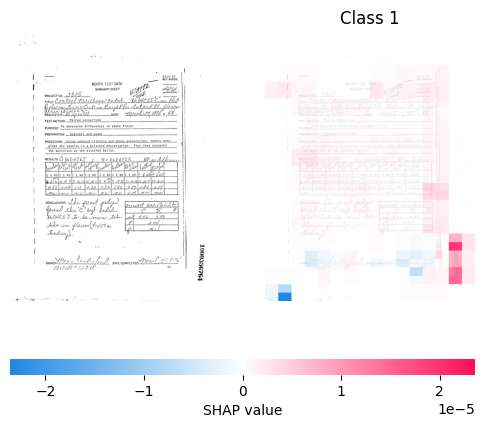

In [132]:
exp = vision_vals[0]

# Extract SHAP values for class 1
class_values = exp.values[:, :, :, 1]   # shape (H, W, 3)

# Display it as an overlay on the original image
shap.image_plot(np.array([class_values]), np.array([exp.data]), labels=["Class 1"], show=True)

In [69]:
print(vals.shape)

(1, 1000, 777, 3, 16)


In [70]:
modal_score = vals[:, ].sum()

In [71]:
print(modal_score)

.values =
np.float64(-2.033630152338373e-08)

.base_values =
array([[2.03669377e-04, 5.88636220e-01, 8.68649659e-05, 1.00087134e-04,
        1.43119440e-04, 4.04586524e-01, 4.85709141e-04, 3.68765759e-04,
        1.05376437e-03, 1.22963072e-04, 4.04116785e-04, 3.03414097e-04,
        1.61511439e-03, 9.76112671e-04, 2.71332538e-04, 6.42221712e-04]])

.data =
np.uint64(568692039)


## Layout

In [46]:
pip install -U shap

In [114]:
H, W = image.size[1], image.size[0]
baseline_box = [0, 0, W, H]


def layout_masker(z):
    """
    z      : 1-D binary mask (np.ndarray or list) length == len(bboxes)
    returns: [masked_boxes]   (SHAP expects list-of-samples)
    """
    z_bool = np.asarray(z).astype(bool)
    masked = [bboxes[i] if keep else baseline_box
              for i, keep in enumerate(z_bool)]
    return masked                # list-of-one-sample

if isinstance(bboxes[0][0], list):          # detect extra wrapper
    bboxes = bboxes[0]                      # drop the outer list

assert len(bboxes) == len(words)            # 87 == 87
n = len(bboxes)
linkage = np.column_stack([np.arange(n-1),
                           np.arange(1, n),
                           np.zeros(n-1),
                           np.ones(n-1)*2]).astype(float)
layout_masker.clustering = linkage
layout_masker.shape = (n, 1)

In [115]:
def make_layout_predict_fn(model, processor, image, words, bboxes):
    """Return a batching function accepted by SHAP."""
    def predict(layout_batch):
        """
        layout_batch: list of lists, each inner list is a boolean mask for bounding boxes
        """
        encs = []
        for coords_mask in layout_batch:
          # coords_mask is a boolean mask indicating which boxes to keep
          # words are not masked, only bboxes are replaced with baseline
          masked_coords = [bboxes[i] if coords_mask[i] else baseline_box for i in range(len(bboxes))]

          enc = processor(
              images=[image],
              text=[words], # Use original words
              boxes=[masked_coords],
              return_tensors="pt",
              padding="max_length",
              truncation=True,
              max_length=128,
          )
          encs.append(enc)


        batch = {k: torch.cat([e[k] for e in encs]).to(device)
                for k in encs[0]}

        with torch.no_grad():
            logits = model(**batch).logits            # (batch, n_classes)
        return torch.softmax(logits, dim=-1).cpu().numpy()
    return predict

In [77]:
print(len(words))
print(len(bboxes))

87
87


In [118]:
predict_fn = make_layout_predict_fn(model, processor, image, words, bboxes)

explainer = shap.Explainer(predict_fn, masker=layout_masker, algorithm="partition")
print(bboxes)
# Pass a mask of ones to the explainer to indicate all boxes are initially considered
vals = explainer(np.ones(len(bboxes)), max_evals=1000) # 1000

[[556, 160, 620, 188], [299, 189, 413, 205], [558, 202, 620, 232], [311, 209, 405, 223], [427, 215, 526, 217], [220, 220, 264, 246], [122, 232, 193, 250], [457, 236, 503, 239], [440, 238, 626, 270], [246, 243, 422, 272], [174, 246, 234, 270], [125, 257, 161, 273], [339, 261, 629, 303], [119, 265, 215, 309], [209, 273, 343, 291], [197, 283, 295, 319], [418, 285, 563, 323], [122, 290, 208, 320], [574, 290, 612, 318], [369, 303, 403, 317], [217, 325, 261, 339], [266, 326, 332, 334], [125, 327, 207, 341], [413, 345, 457, 359], [203, 347, 265, 361], [271, 347, 347, 361], [372, 348, 406, 356], [125, 353, 181, 367], [125, 377, 203, 391], [217, 377, 273, 391], [277, 377, 341, 389], [245, 401, 355, 417], [359, 401, 509, 417], [513, 401, 557, 415], [125, 403, 197, 417], [203, 403, 241, 417], [562, 404, 588, 412], [407, 419, 437, 433], [454, 420, 482, 428], [488, 420, 516, 428], [524, 420, 576, 428], [206, 422, 250, 430], [292, 422, 346, 430], [354, 422, 406, 430], [137, 437, 161, 451], [193, 437

TypeError: layout_masker() takes 1 positional argument but 2 were given

## Modality contributions using MM-SHAP

In [154]:
print(text_vals.shape)
print(vision_vals.shape)
print(text_vals)
print(vision_vals)

(1, 87, 1)
(1, 1000, 777, 3, 1)
.values =
array([[[-0.03757608],
        [-0.03757827],
        [ 0.08151235],
        [ 0.16584304],
        [-0.02383136],
        [-0.00804302],
        [-0.01611163],
        [-0.01157238],
        [-0.00259987],
        [-0.00720192],
        [ 0.02317619],
        [ 0.0849234 ],
        [-0.00043843],
        [ 0.0026246 ],
        [-0.0056184 ],
        [ 0.00678443],
        [-0.02557061],
        [-0.02019039],
        [ 0.03387791],
        [ 0.07524607],
        [ 0.02078986],
        [ 0.02019629],
        [ 0.00177546],
        [-0.00129033],
        [-0.01285421],
        [-0.02106643],
        [ 0.00477976],
        [ 0.04238343],
        [ 0.02734421],
        [-0.0016403 ],
        [ 0.00085442],
        [-0.00862369],
        [ 0.04405806],
        [ 0.0264999 ],
        [ 0.01650247],
        [-0.00673604],
        [ 0.00133763],
        [ 0.00389305],
        [ 0.00495869],
        [ 0.00168724],
        [-0.00244849],
        [-0.008

In [155]:
def mm_shap_contribution_single(text_exp, img_exp):
    """
    text_exp, img_exp: shap.Explanation each containing **one** class column
                       and exactly one sample (batch dim == 1).

    Returns: (text_share, vision_share)
    """
    # 1) strip the batch and class dimensions
    phi_t = text_exp.values.squeeze()        # (87,)   → tokens
    phi_v = img_exp.values.squeeze()         # (1000,777,3) → pixels

    # 2) flatten and take absolute
    t_score = np.abs(phi_t).sum()
    v_score = np.abs(phi_v).sum()

    text_share = t_score / (t_score + v_score + 1e-12)
    return text_share, 1 - text_share

In [156]:
t, v = mm_shap_contribution_single(text_vals[0], vision_vals[0])
print(f"Text {t:.3f}   Vision {v:.3f}")

Text 0.712   Vision 0.288
